In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from ConvNet import ConvLayer, ConvNet, FlattenLayer, DenseLayer
from keras.datasets import mnist

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# train_shuffle = np.random.permutation(len(X_train)).reshape(-1, 1)
# X_train = X_train[train_shuffle]
# Y_train = Y_train[train_shuffle]

X_train = X_train.reshape(-1, 1, 28, 28) / 255.0
X_test  = X_test.reshape(-1, 1, 28, 28)  / 255.0
Y_train = tf.keras.utils.to_categorical(Y_train).T
Y_test  = tf.keras.utils.to_categorical(Y_test).T

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((60000, 1, 28, 28), (10000, 1, 28, 28), (10, 60000), (10, 10000))

In [3]:
net = ConvNet()
net.add(ConvLayer(num_filters = 8, filter_size = 5, stride = 1, mode = 'same'))
net.add(ConvLayer(num_filters = 8, filter_size = 5, stride = 2, mode = 'valid'))
net.add(FlattenLayer())
net.add(DenseLayer(num_units = 10, activation='softmax'))
hist_loss, hist_acc = net.fit(X_train[:6016], Y_train[:, :6016], num_epochs = 10, learning_rate = 5e-3)

[Epoch  1/10] - [=============================>] - loss: 2.9878 - train_accuracy: 0.4508
[Epoch  2/10] - [=============================>] - loss: 2.4806 - train_accuracy: 0.7309
[Epoch  3/10] - [=============================>] - loss: 2.0408 - train_accuracy: 0.7776
[Epoch  4/10] - [=============================>] - loss: 1.6758 - train_accuracy: 0.8055
[Epoch  5/10] - [=============================>] - loss: 1.4086 - train_accuracy: 0.8196
[Epoch  6/10] - [=============================>] - loss: 1.2219 - train_accuracy: 0.8314
[Epoch  7/10] - [=============================>] - loss: 1.0899 - train_accuracy: 0.8394
[Epoch  8/10] - [=============================>] - loss: 0.9942 - train_accuracy: 0.8491
[Epoch  9/10] - [=============================>] - loss: 0.9231 - train_accuracy: 0.8567
[Epoch 10/10] - [=============================>] - loss: 0.8689 - train_accuracy: 0.8619


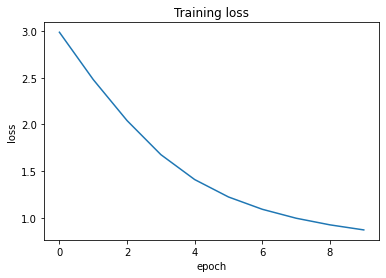

In [4]:
plt.plot(hist_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training loss')
plt.show()

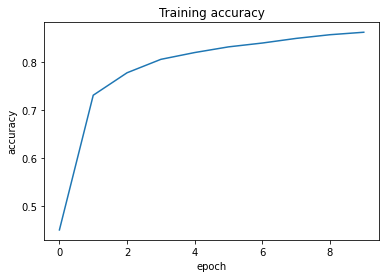

In [5]:
plt.plot(hist_acc)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Training accuracy')
plt.show()

In [6]:
test_loss, test_acc = net.evaluate(X_test, Y_test)
print('test_loss: {:.4f} - test_accuracy: {:.4f}'.format(test_loss, test_acc))

[Epoch 1/1] - [=============================>] - loss: 1.0426 - train_accuracy: 0.8400
test_loss: 0.8613 - test_accuracy: 0.8581


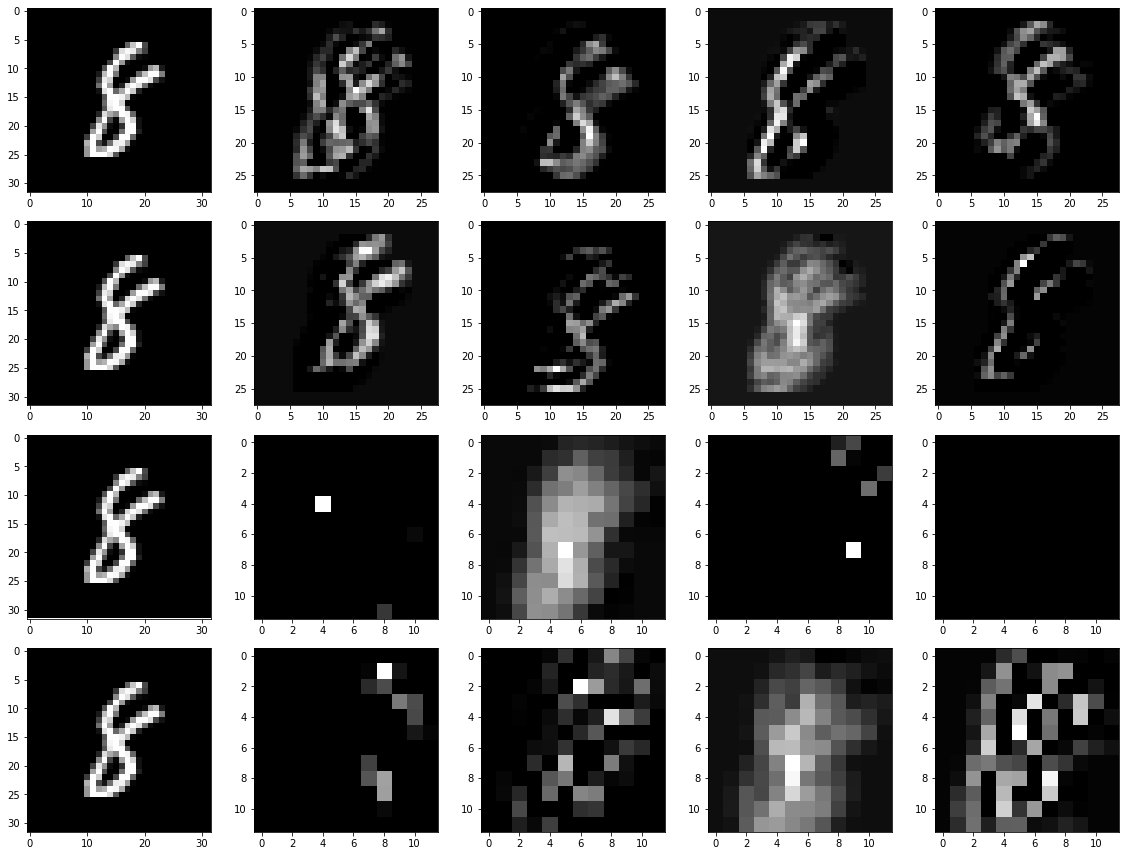

In [7]:
idx = 0

input_batch = net.layers[0].input_batch[idx]
activation  = net.layers[0].a_out[idx]
activation2 = net.layers[1].a_out[idx]

fig, ax = plt.subplots(4, 5)
fig.set_size_inches((16, 12))

for i in range(2):
    ax[i, 0].imshow(input_batch[0], cmap = 'gray')
    for j in range(4):
        ax[i, 1 + j].imshow(activation[i * 4 + j], cmap = 'gray')
        
for i in range(2):
    ax[2 + i, 0].imshow(input_batch[0], cmap = 'gray')
    for j in range(4):
        ax[2 + i, 1 + j].imshow(activation2[i * 4 + j], cmap = 'gray')
plt.tight_layout()
plt.show()